<a href="https://colab.research.google.com/github/gaberibr/Cases_DataAnalysis/blob/main/Case_Mercado_de_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#bibliotecas para modelagem e matrizes
import numpy as np
import pandas as pd

#bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#bibliotecas para avisos
import warnings

#desabilitando avisos
warnings.filterwarnings ('ignore')

In [56]:
#lendo dados, erro UTF-8
data_base = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

#verificar
data_base.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [57]:
data_base.shape

(1034, 9)

In [58]:
#nulos
data_base.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

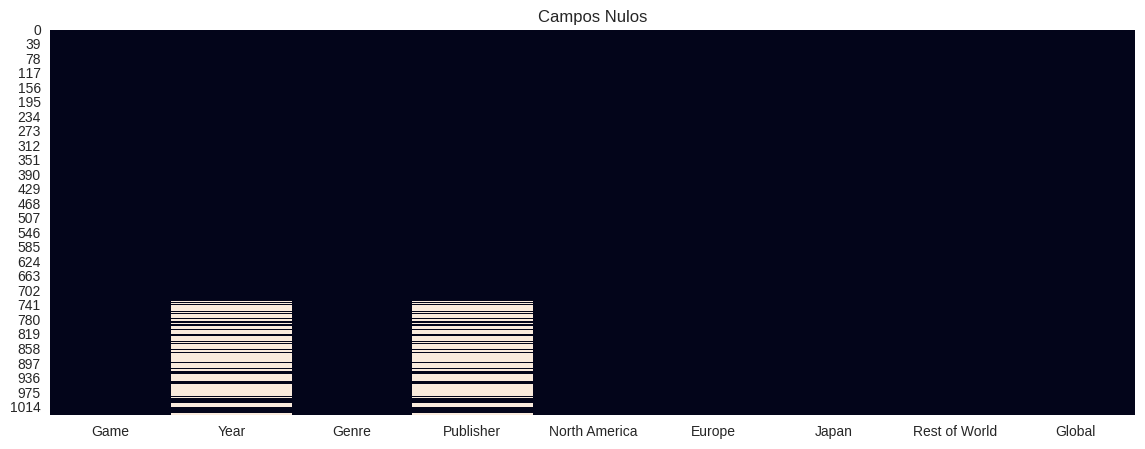

In [59]:
#nulos gráficos
plt.figure(figsize=(14,5))
plt.title('Campos Nulos')
sns.heatmap(data_base.isnull(), cbar=False);

In [60]:
#retirando valores nulos
data_base.dropna(inplace=True)

In [61]:
#estatisticas
data_base.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


*possívelmente jogos com menos de 10 mil vendas, foram nulos*

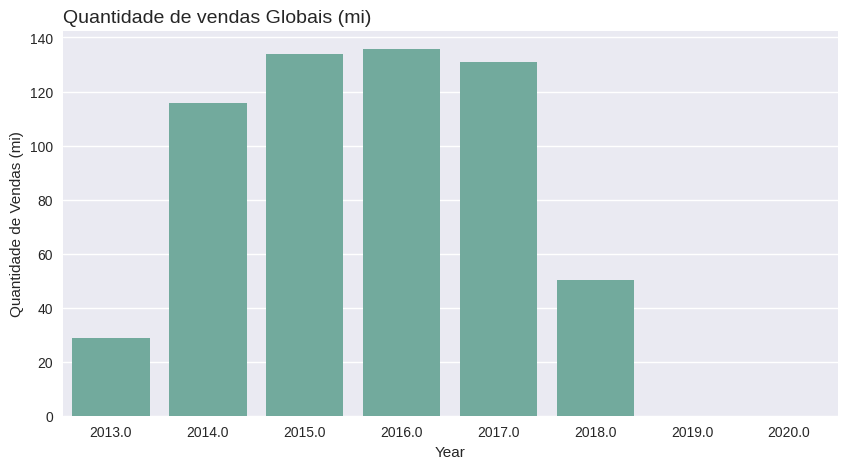

In [62]:
#tamanho da imagem
plt.figure(figsize=(10,5))

#titulo
plt.title('Quantidade de vendas Globais (mi)', loc='left', fontsize=14)

#gráfico
sns.barplot(data = data_base, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)

#label
plt.ylabel('Quantidade de Vendas (mi)');

In [63]:
#retirar os anos
data_base.loc[(data_base['Year'] !=2019) & (data_base['Year'] !=2020)]

#verificar
data_base.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


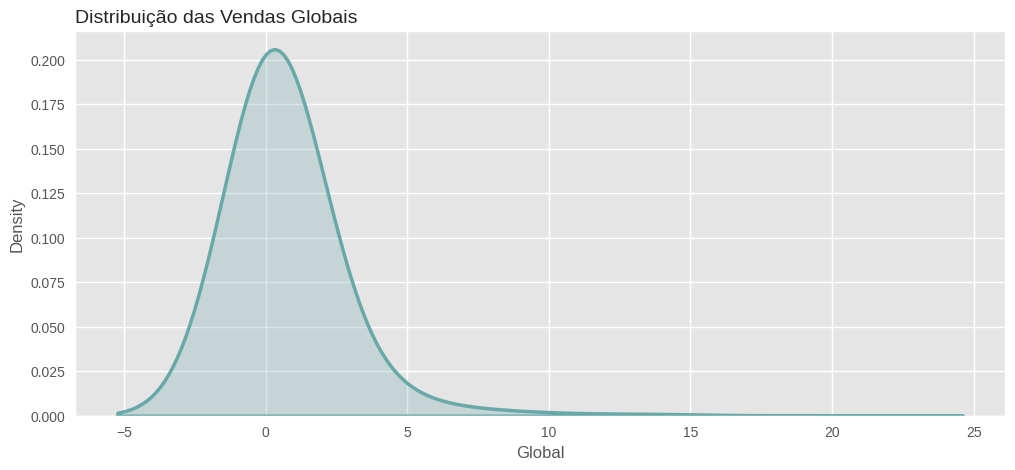

In [64]:
#tamanho
plt.figure(figsize=(12,5))

#estilho
plt.style.use('ggplot')

#titulo
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14)
sns.kdeplot(data_base['Global'], shade=True, bw=1, color='#69a8a8', linewidth=2.5);

In [65]:
Analise = data_base.groupby(by=['Year']).sum().reset_index()

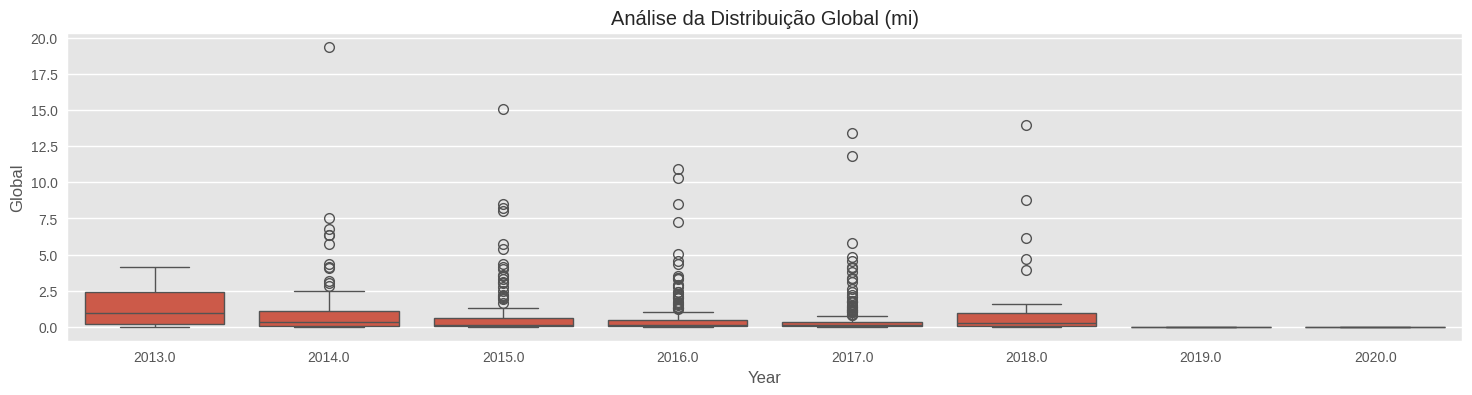

In [66]:
plt.figure(figsize=(18,4))

plt.title('Análise da Distribuição Global (mi)')
sns.boxplot(data = data_base, x='Year', y='Global');

In [67]:
data_base.loc[data_base['Global']>= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


*É notavel os jogos mais vendidos, sendo o primeiro GTA V, segundo o CoD 3 e Red Dead Redemption 2. Fifa 17 e 18 (ou seja, uma atualização) assim como CoD em ambitos diferente. As duas empresas que mais se destacam são Rockstar Games e Activision. Cada uma com 2 jogos entre o top 10 nesse período análisado.*

In [68]:
data_base

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [69]:
data_base['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [70]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

data_base['Produtor'] = Funcao_Label.fit_transform( data_base['Publisher'] )
data_base['Genero'] = Funcao_Label.fit_transform( data_base['Genre'] )
data_base['Jogo'] = Funcao_Label.fit_transform( data_base['Game'] )

data_base.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,109,0,283
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,103
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,109,1,534
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,107
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,41,14,229


In [71]:
paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

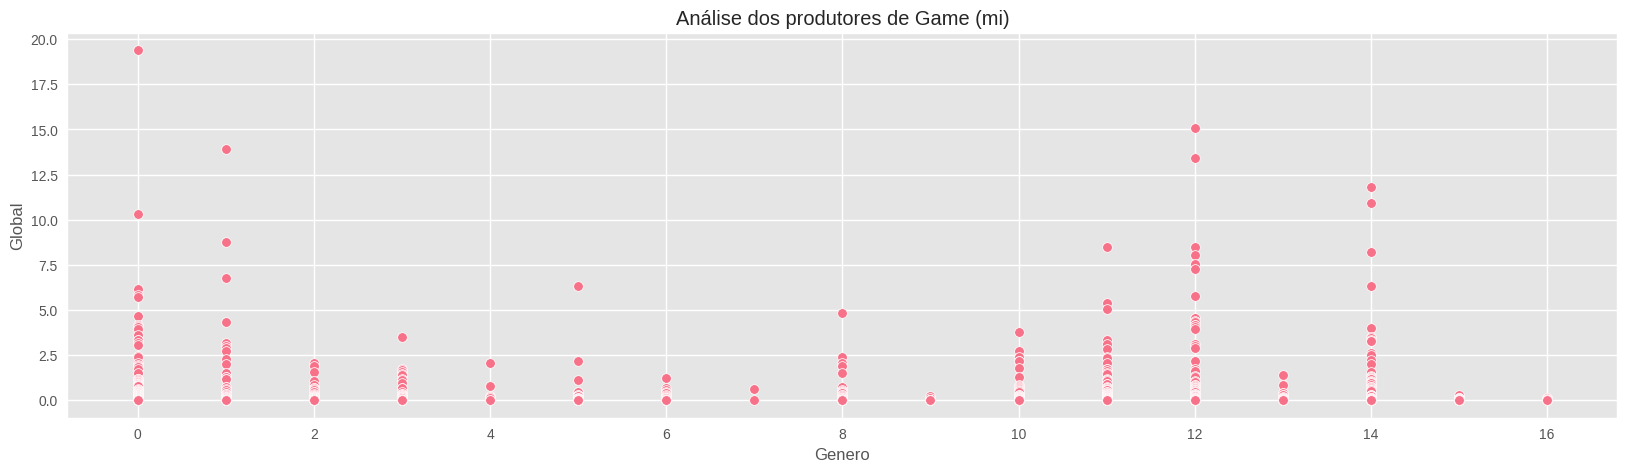

In [72]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data = data_base, x='Genero', y='Global', color=paleta_cores[0] );

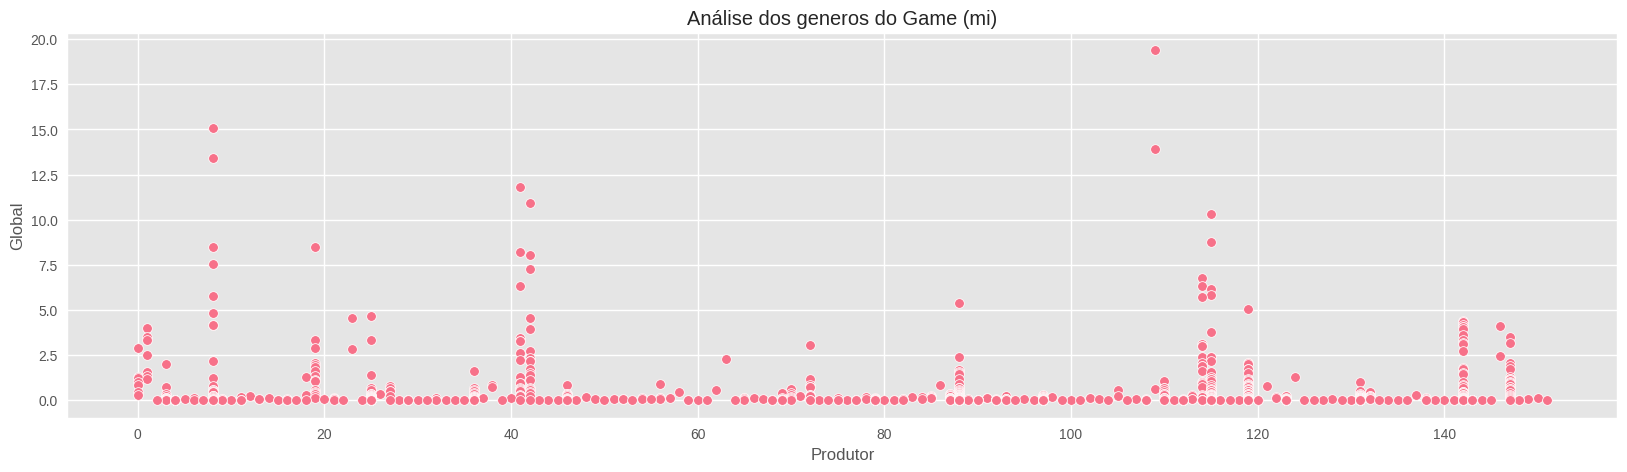

In [73]:
plt.figure( figsize=(20,5))
plt.title('Análise dos generos do Game (mi)')
sns.scatterplot(data = data_base, x='Produtor', y='Global', color=paleta_cores[0] );